Reads the initial data and initial imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math
from utils import estimate_gaussian

df = pd.read_csv('../data/dataset_concurso.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164163 entries, 0 to 164162
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ï»¿IdConcurso                  164163 non-null  object 
 1   IdFase                         164163 non-null  object 
 2   Orden                          164163 non-null  int64  
 3   IdEscuela                      164163 non-null  object 
 4   NivelEscolarCode               164163 non-null  int64  
 5   Grado                          164163 non-null  object 
 6   IdEstudiante                   164163 non-null  object 
 7   IdMaratonFaseEstudiante        164163 non-null  object 
 8   SeleccionadoParaSiguienteFase  164163 non-null  int64  
 9   IdMaratonFaseTask              164163 non-null  object 
 10  IsPrueba                       164163 non-null  int64  
 11  Orden.1                        164163 non-null  int64  
 12  IsActivo                      

First we get two samples, one for the real test and another for the practice tests.

Text(0, 0.5, 'Calificacion')

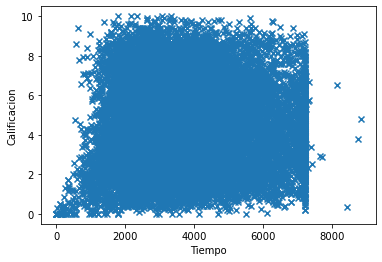

In [7]:
dfExamen = df[['IdEstudiante', 'IdEscuela', 'Grado', 'Calificacion', 'Tiempo', 'IsPrueba']].where(df['IsPrueba']==0)

dfExamen.drop_duplicates(keep='first', inplace=True)

plt.scatter(dfExamen['Tiempo'], dfExamen['Calificacion'], marker = 'x')
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')

Let's see the distribution for practices

Text(0, 0.5, 'Calificacion')

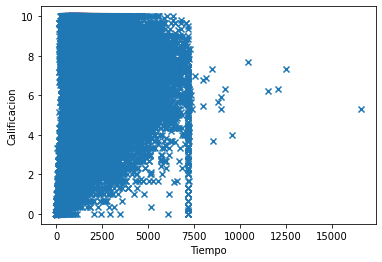

In [8]:
dfPractica= df[['IdEstudiante', 'IdEscuela', 'Grado', 'Calificacion', 'Tiempo', 'IsPrueba']].where(df['IsPrueba']==1)

dfPractica.drop_duplicates(keep='first', inplace=True)

plt.scatter(dfPractica['Tiempo'], dfPractica['Calificacion'], marker = 'x')
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')

Find the mean, and the variance for our 2 relevant features: calificacion, tiempo.

In [11]:
mu, sigma2 = estimate_gaussian(dfExamen['Calificacion'])
print('mean: ', mu,' variance: ', sigma2)

IndexError: tuple index out of range